In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
import shap
import lightgbm as lgb

In [5]:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
%matplotlib inline

In [8]:
data = pd.read_csv('final_elem+hard-feat_data.csv')
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

In [25]:
df = pd.read_csv('ranking_elem+hard-feat.csv')
df_ = df[:15]
rem_no = [6, 12, 13, 14]
df_.drop(rem_no, inplace=True)
features = df_['Features']
features

0      $\bar {\Delta \chi}$
1                $GM(\eta)$
2             $\bar {\chi}$
3                $IC^{max}$
4                $\hat{MN}$
5              $\chi^{min}$
7           $T_{M}^{range}$
8                 $\bar{P}$
9           $\hat{N_{p,V}}$
10            $\bar{E_{g}}$
11    $\sigma(\Delta \chi)$
Name: Features, dtype: object

In [10]:
rand=7
t_s=0.1

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size=t_s,random_state=rand)
params = {'objective': 'regression', 'boosting_type': 'gbdt', 'lambda_l1': 6.361891201722241e-06,
              'lambda_l2': 0.058922915363507904, 'num_leaves': 41, 'feature_fraction': 0.5275591175500290, 
              'bagging_fraction': 0.9668053101704331, 'bagging_freq': 1, 'min_child_samples': 13, 
              'learning_rate': 0.09969741854704843} 
d_train = lgb.Dataset(X_train, label=Y_train)
reg = lgb.train(params, d_train)
Y_pred_test = reg.predict(X_test)
Y_pred_train = reg.predict(X_train)
rmse_test=np.sqrt(mean_squared_error(Y_test,Y_pred_test))
rmse_train=np.sqrt(mean_squared_error(Y_train,Y_pred_train))
print("RMSE train:  ", rmse_train)
print("RMSE test:  ",  rmse_test)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 2789, number of used features: 11
[LightGBM] [Info] Start training from score -0.572444
RMSE train:   0.09678050022940497
RMSE test:   0.1310547138614205


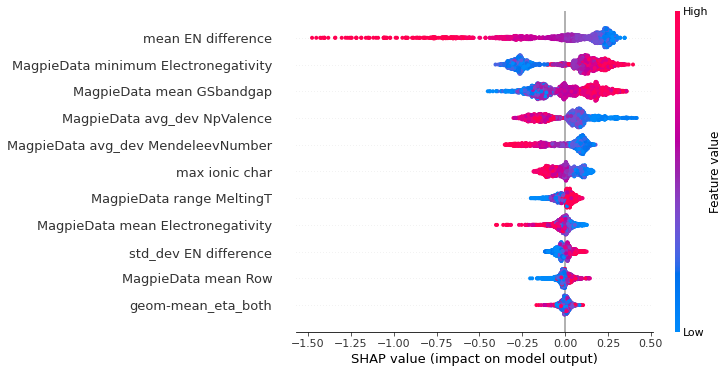

In [35]:
## SHAP Plots
explainerModel = shap.TreeExplainer(model=reg)
shap_values = explainerModel.shap_values(X_train)
shap.summary_plot(shap_values, X_train, show=False)
ax = plt.gca()
features_r =  features[::-1]   # for setting least important feature at '0' of y-axis
# print(features_r)
# ax.set_yticklabels(labels=features_r)

In [36]:
shap_values

array([[ 0.24684378, -0.00137822, -0.02734912, ...,  0.04163664,
        -0.10408095,  0.03901473],
       [ 0.1829818 ,  0.02138982, -0.02805108, ...,  0.10727635,
        -0.17604194,  0.00171993],
       [ 0.14131406,  0.03247144, -0.00918308, ...,  0.17090995,
         0.15128083,  0.00817736],
       ...,
       [ 0.25902772,  0.01245577, -0.00784756, ...,  0.00849189,
         0.17620667, -0.00583553],
       [-0.02153587, -0.01216224, -0.00889223, ...,  0.08423463,
        -0.12194975, -0.00919591],
       [ 0.29267322,  0.03708503,  0.00841879, ...,  0.26857969,
         0.30579058,  0.01276286]])